# Exploratory Data Analysis

<div class="span5 alert alert-info">
Initial data analysis to understand the given problem

This project deals with customer transactions, offers and history of customers receiving the offer.

<p>This data is available at [Kaggle](https://www.kaggle.com/c/acquire-valued-shoppers-challenge/data)</p><br>
<i>Some questions for which I tried to look answers through this Analysis</i><br><br>

<b> Questions </b>

<ul>
    <li>Which are various features in the given data?</li>
    <li>What percent of customers receiving offer have repeated purchase?</li>
    <li>Which offers are given to most customers? what product or company products do those belong?</li>
    <li>Which Company or product did the customers transacted most? or spent most buying?</li>
    <li>Which features are important? or possibly have impact on customers to repeat purchase?</li>
</ul>
</div>

<div><h3>Download data for this project into data folder (extract the zip file) </h3><br>
    [transactions](https://drive.google.com/file/d/1GQDqcLaRgLA7WpPkhTjD6gJ7MsgJDXJJ/view?usp=sharing)<br>
[history](https://drive.google.com/file/d/1bQEaPp5WWUzMn19SgdpBkx-0FrxMKrss/view?usp=sharing)<br>
[offers](https://drive.google.com/file/d/187pRzBYddjrSNlInz2R6liHKaQ99j-R-/view?usp=sharing)<br>
    </div>

In [1]:
## Imports
from collections import Counter
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
# Load data
# Cust Offer History
hist = pd.read_csv("../../data/trans_Hist16000.csv")

# Offer Information
offers = pd.read_csv("../../data/offers.csv")

# Transactions for customer who received Offer
trans = pd.read_csv("../../data/transactions_16000.csv")

In [3]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
id             16000 non-null int64
chain          16000 non-null int64
offer          16000 non-null int64
market         16000 non-null int64
repeattrips    16000 non-null int64
repeater       16000 non-null object
offerdate      16000 non-null object
dtypes: int64(5), object(2)
memory usage: 875.1+ KB


In [4]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
offer         37 non-null int64
category      37 non-null int64
quantity      37 non-null int64
company       37 non-null int64
offervalue    37 non-null float64
brand         37 non-null int64
dtypes: float64(1), int64(5)
memory usage: 1.8 KB


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17359709 entries, 0 to 17359708
Data columns (total 12 columns):
index               int64
id                  int64
chain               int64
dept                int64
category            int64
company             int64
brand               int64
date                object
productsize         float64
productmeasure      object
purchasequantity    int64
purchaseamount      float64
dtypes: float64(2), int64(8), object(2)
memory usage: 1.6+ GB


In [6]:
# merge the offer and customer offer history data to get better understanding
hist_offer = hist.merge(offers,left_on='offer',right_on='offer')
replace_repeater = {"repeater":     {"t": 1, "f": 0}}
hist_offer.replace(replace_repeater,inplace=True)
hist_offer.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
0,705936120,165,1208329,21,0,0,2013-04-23,2119,1,108079383,1.0,6926
1,3814736505,77,1208329,37,2,1,2013-04-22,2119,1,108079383,1.0,6926
2,4627974746,153,1208329,12,10,1,2013-04-23,2119,1,108079383,1.0,6926
3,4623268450,153,1208329,12,0,0,2013-04-25,2119,1,108079383,1.0,6926
4,501138510,21,1208329,10,0,0,2013-04-22,2119,1,108079383,1.0,6926


In [7]:
hist_offer.nunique()

id             16000
chain            112
offer             24
market            34
repeattrips       29
repeater           2
offerdate         56
category          13
quantity           1
company           11
offervalue         6
brand             12
dtype: int64

In [8]:
trans.head()

,index,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,31334,13089312,15,96,9632,107675070,52936,2012-03-05,1.0,CT,1,15.00
1,31335,13089312,15,58,5811,102113020,28503,2012-03-05,8.0,OZ,1,5.99
2,31336,13089312,15,99,9902,107432676,1161,2012-03-05,14.0,OZ,1,1.25
3,31337,13089312,15,58,5823,107300777,3899,2012-03-05,5.0,OZ,1,4.99
4,31338,13089312,15,37,3706,104119646,14582,2012-03-05,19.0,OZ,2,3.78


<u><b><h3>Plot to view percentage of customers who repeated the purchase when offered a discount coupon</h3>

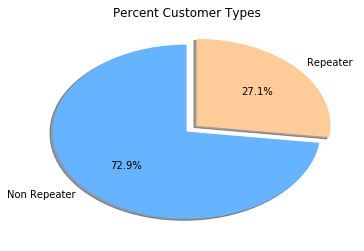

In [9]:
c = Counter()
c.update(hist_offer['repeater'])

labels = ['Non Repeater', 'Repeater']
sizes = []
for label, val in c.items():
    sizes.append(val)


# Pie plot of Train History
explode = (0, 0.1)  
colors = ['#66b3ff','#ffcc99']
figure(0)
pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
title("Percent Customer Types")
savefig('../../plot/percent_distribution.png', bbox_inches='tight')
show()

<u><b><h3>Plot to view Correlation between different features</h3>

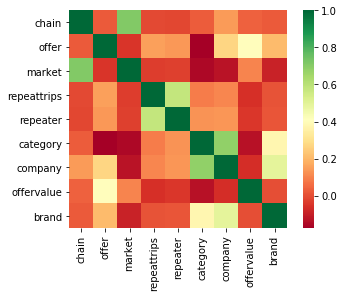

In [10]:
hist_offer['quantity'] = str(hist_offer['quantity'])
sns.heatmap(hist_offer.drop(['id'],axis=1).corr(), square=True, cmap='RdYlGn')
savefig('../../plot/feature_correlation_1.png', bbox_inches='tight')
show()

In [11]:
trans['total_transactions_count'] = ''
agg_trans = pd.DataFrame(trans.groupby(['id']).agg({'total_transactions_count':"count",'purchaseamount':sum,'purchasequantity':sum})).reset_index()
agg_trans.head()

,id,purchaseamount,purchasequantity,total_transactions_count
0,13089312,3890.68,1469,1218
1,13873775,6088.08,2955,1463
2,16138642,1872.07,734,537
3,16238376,1836.97,722,576
4,17486592,8078.55,2014,1526


In [12]:
trans_hist_offer = pd.merge(hist_offer[['id','offer','repeater','repeattrips','company','category','brand']],agg_trans,left_on='id',right_on='id')
trans_hist_offer.head()

,id,offer,repeater,repeattrips,company,category,brand,purchaseamount,purchasequantity,total_transactions_count
0,705936120,1208329,0,0,108079383,2119,6926,1215.52,1519,1186
1,3814736505,1208329,1,2,108079383,2119,6926,2572.55,1520,876
2,4627974746,1208329,1,10,108079383,2119,6926,3518.32,1227,987
3,4623268450,1208329,0,0,108079383,2119,6926,8685.71,3678,2445
4,501138510,1208329,0,0,108079383,2119,6926,9061.84,3149,2063


In [13]:
trans_hist_offer.nunique()

id                          16000
offer                          24
repeater                        2
repeattrips                    29
company                        11
category                       13
brand                          12
purchaseamount              15991
purchasequantity             3891
total_transactions_count     2854
dtype: int64

In [14]:
trans_hist_offer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 10 columns):
id                          16000 non-null int64
offer                       16000 non-null int64
repeater                    16000 non-null int64
repeattrips                 16000 non-null int64
company                     16000 non-null int64
category                    16000 non-null int64
brand                       16000 non-null int64
purchaseamount              16000 non-null float64
purchasequantity            16000 non-null int64
total_transactions_count    16000 non-null int64
dtypes: float64(1), int64(9)
memory usage: 1.3 MB


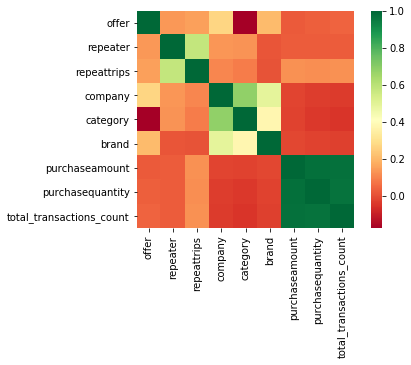

In [15]:
sns.heatmap(trans_hist_offer.drop(['id'],axis=1).corr(), square=True, cmap='RdYlGn')
savefig('../../plot/feature_correlation_2.png', bbox_inches='tight')
show()

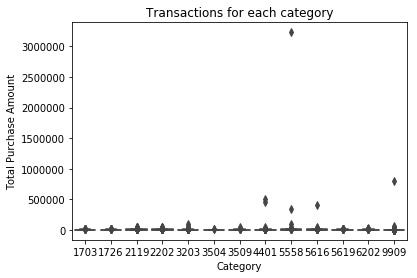

In [16]:
sns.boxplot(x='category',y='purchaseamount',data=trans_hist_offer)
rcParams['figure.figsize'] = [20, 5]
xlabel('Category')
ylabel('Total Purchase Amount')
title('Transactions for each category')
show()

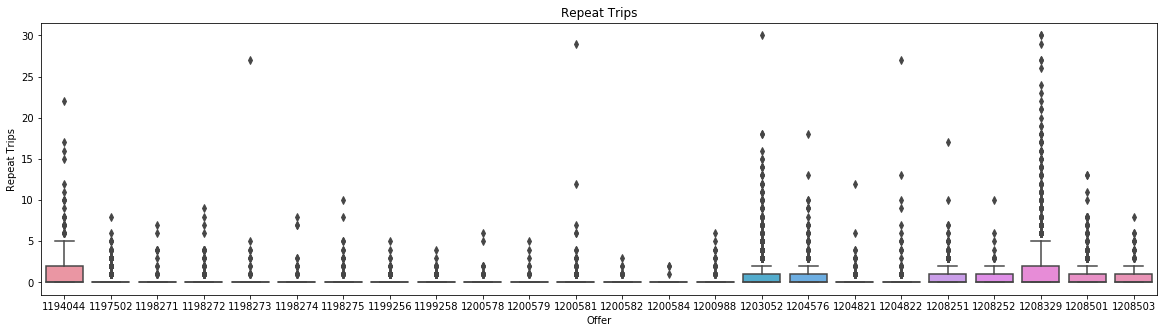

In [17]:
sns.boxplot(x='offer',y='repeattrips',data=hist_offer)
rcParams['figure.figsize'] = [20, 5]
xlabel('Offer')
ylabel('Repeat Trips')
title('Repeat Trips')
show()

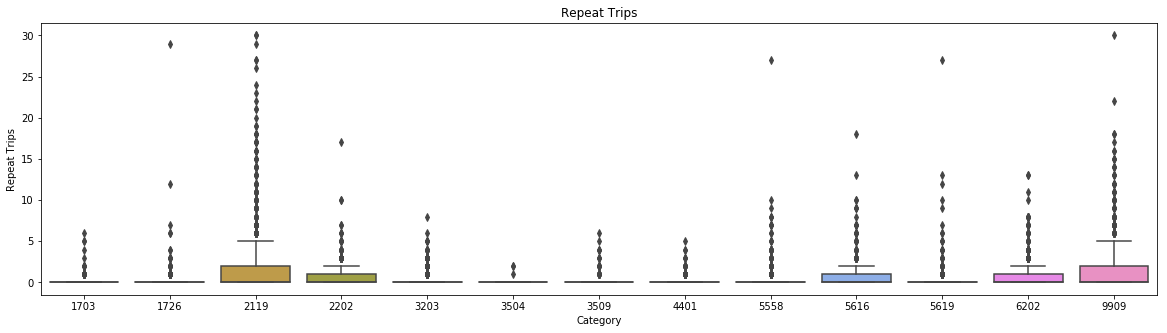

In [18]:
sns.boxplot(x='category',y='repeattrips',data=hist_offer)
rcParams['figure.figsize'] = [20, 5]
xlabel('Category')
ylabel('Repeat Trips')
title('Repeat Trips')
show()

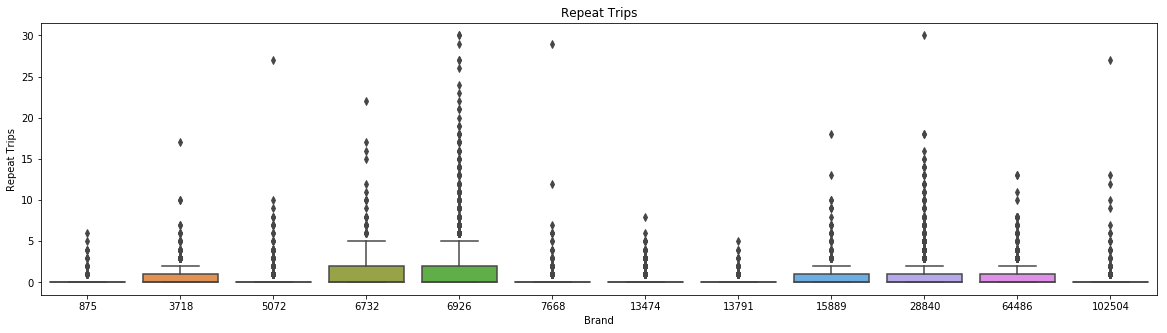

In [19]:
sns.boxplot(x='brand',y='repeattrips',data=hist_offer)
rcParams['figure.figsize'] = [20, 5]
xlabel('Brand')
ylabel('Repeat Trips')
title('Repeat Trips')
show()

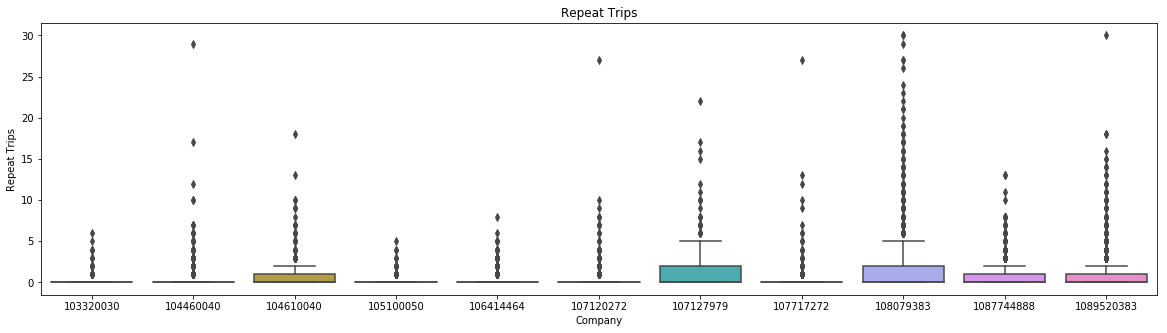

In [20]:
sns.boxplot(x='company',y='repeattrips',data=hist_offer)
rcParams['figure.figsize'] = [20, 5]
xlabel('Company')
ylabel('Repeat Trips')
title('Repeat Trips')
show()

In [21]:
# Added these to make count of records for analysis
hist_offer['m']=1
offers['m']=1
trans['m']=1

<u><b><h3>Plot to view Categories with number of returning Customers in a sorted order </h3>

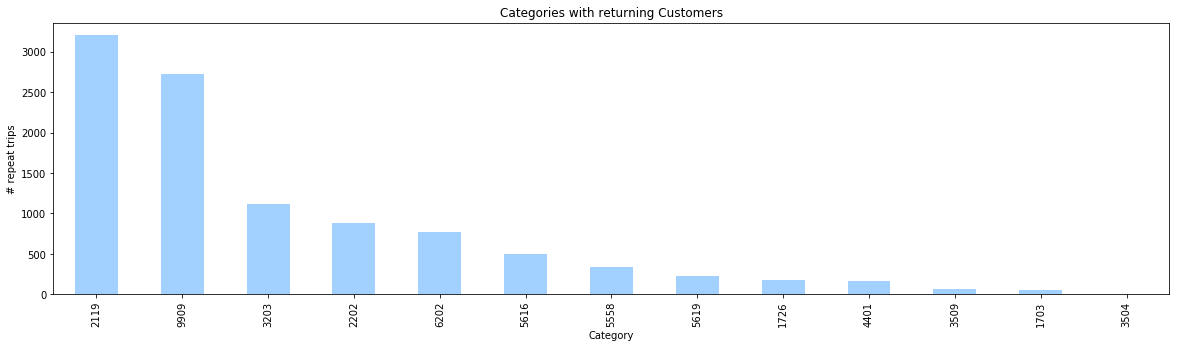

In [22]:
hist_offer.groupby(["category"])["repeattrips"].sum().sort_values(ascending=False).plot(kind='bar',color='#66b3ff', alpha=0.6)
title("Categories with returning Customers")
ylabel("# repeat trips")
xlabel("Category")
_ = rcParams['figure.figsize'] = [20, 15]
savefig('../../plot/offer_category_most_returntrips.png', bbox_inches='tight')
show()

<u><b><h3>Plot to view Categories with number of Offers</h3>

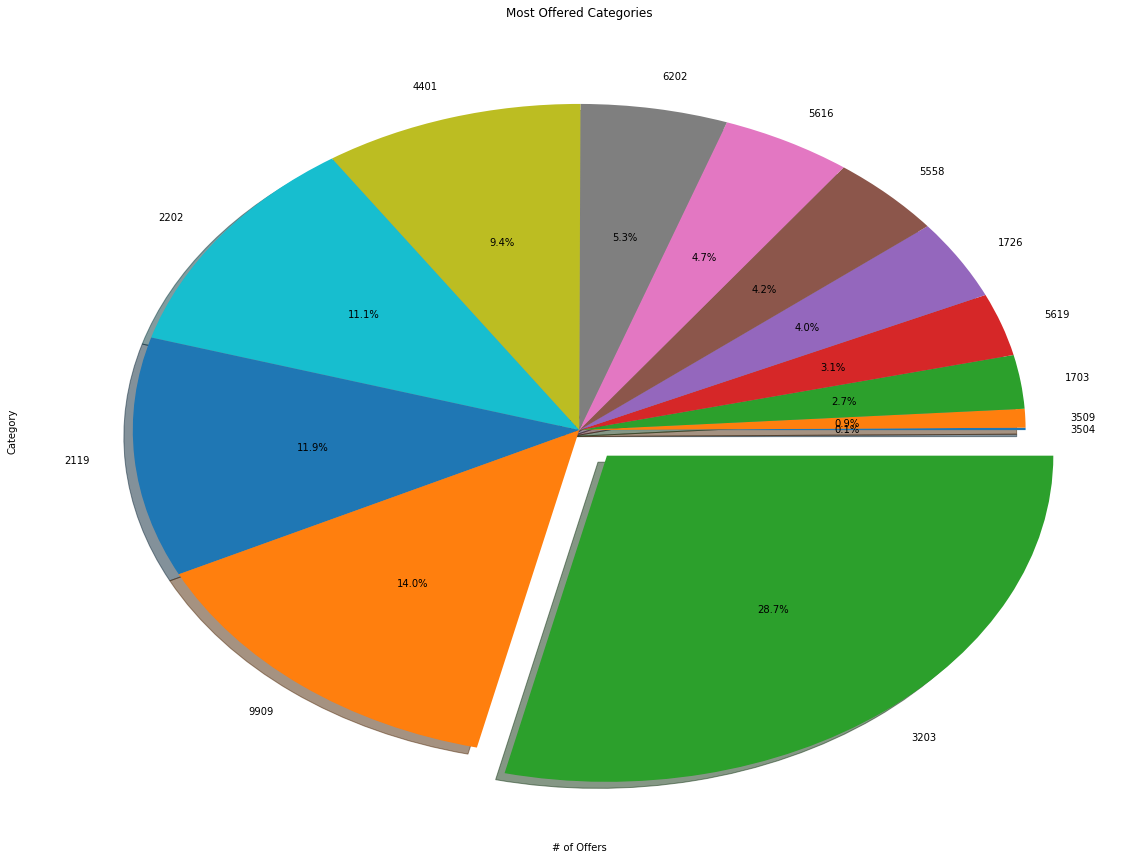

In [23]:
hist_offer.groupby(["category"])["m"].count().sort_values().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode = (0, 0,0,0,0,0,0,0,0,0,0,0,0.1))
title("Most Offered Categories")
ylabel("Category")
xlabel("# of Offers")
_ = rcParams['figure.figsize'] = [20, 15]
savefig('../../plot/popular_category.png', bbox_inches='tight')
show()

<u><b><h3>Plot to view # of Customers Received each Offer</h3>

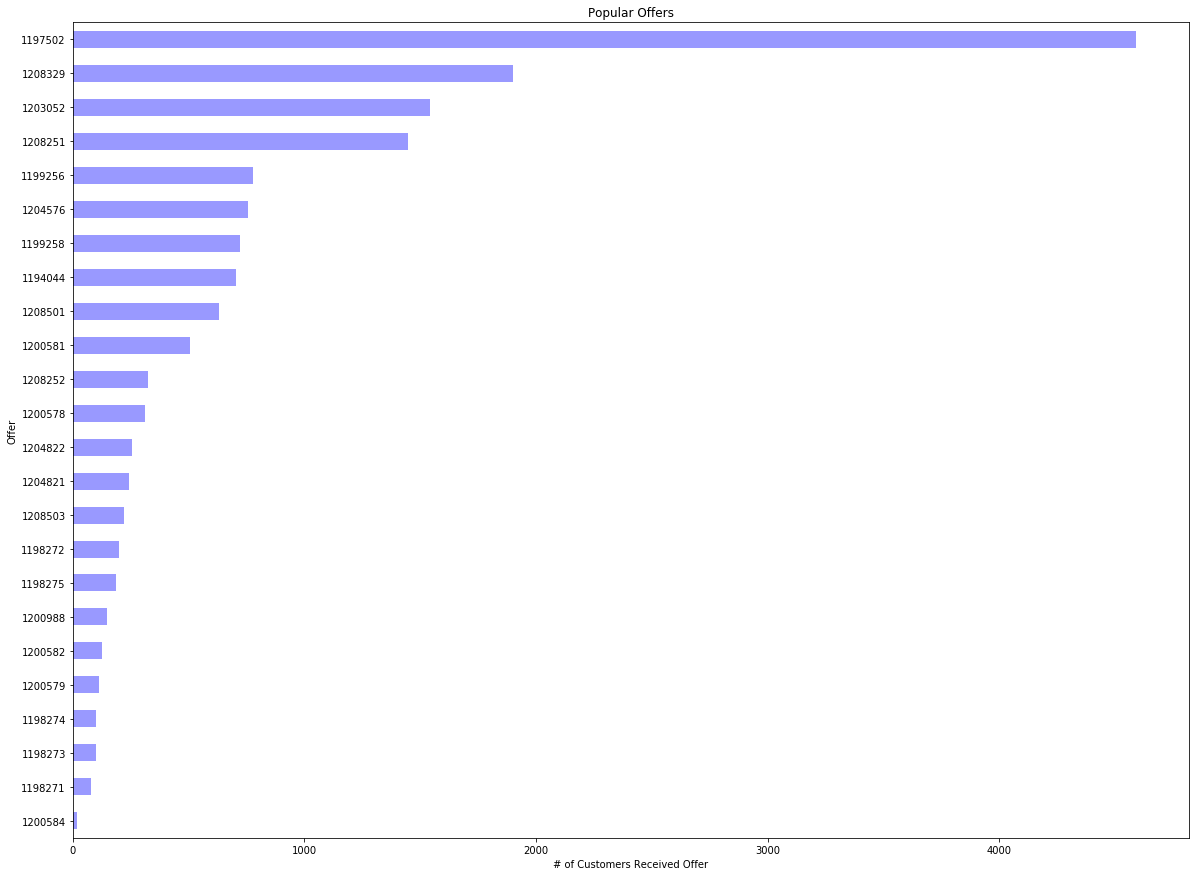

In [24]:
hist_offer.groupby(["offer"])["m"].count().sort_values().plot(kind='barh',color='blue', alpha=0.4)
title("Popular Offers")
ylabel("Offer")
xlabel("# of Customers Received Offer")
_ = rcParams['figure.figsize'] = [20, 15]
savefig('../../plot/popular_offer.png', bbox_inches='tight')
show()

<u><b><h3>Plot to view # of Customers Received each Category, Offer</h3>

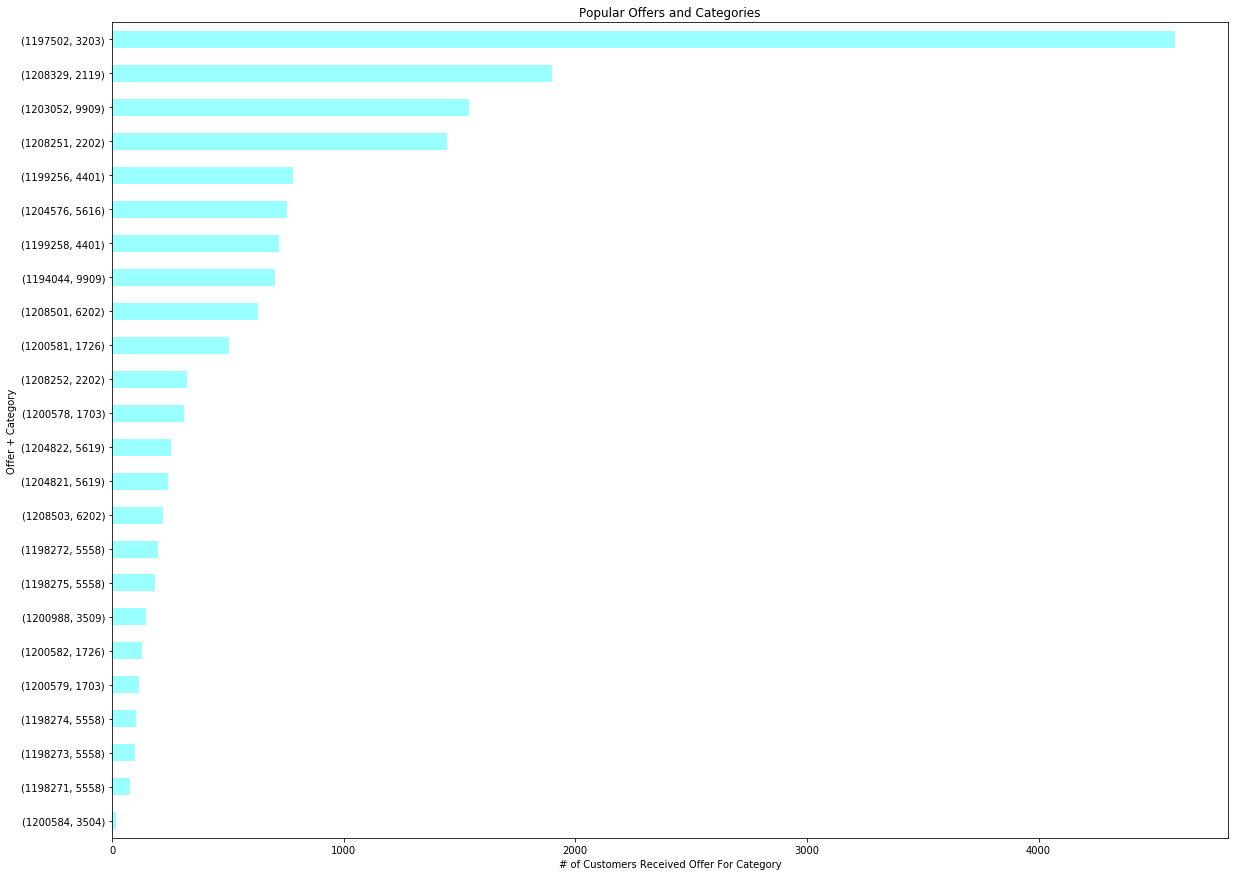

In [25]:
hist_offer.groupby(["offer","category"])["m"].count().sort_values().plot(kind='barh',color='cyan', alpha=0.4)
title("Popular Offers and Categories")
ylabel("Offer + Category")
xlabel("# of Customers Received Offer For Category")
_ = rcParams['figure.figsize'] = [20, 15]
savefig('../../plot/popular_offer_category.png', bbox_inches='tight')
show()

<u><b><h3>Plot to view Top 25 Most Transacted Categories</h3>

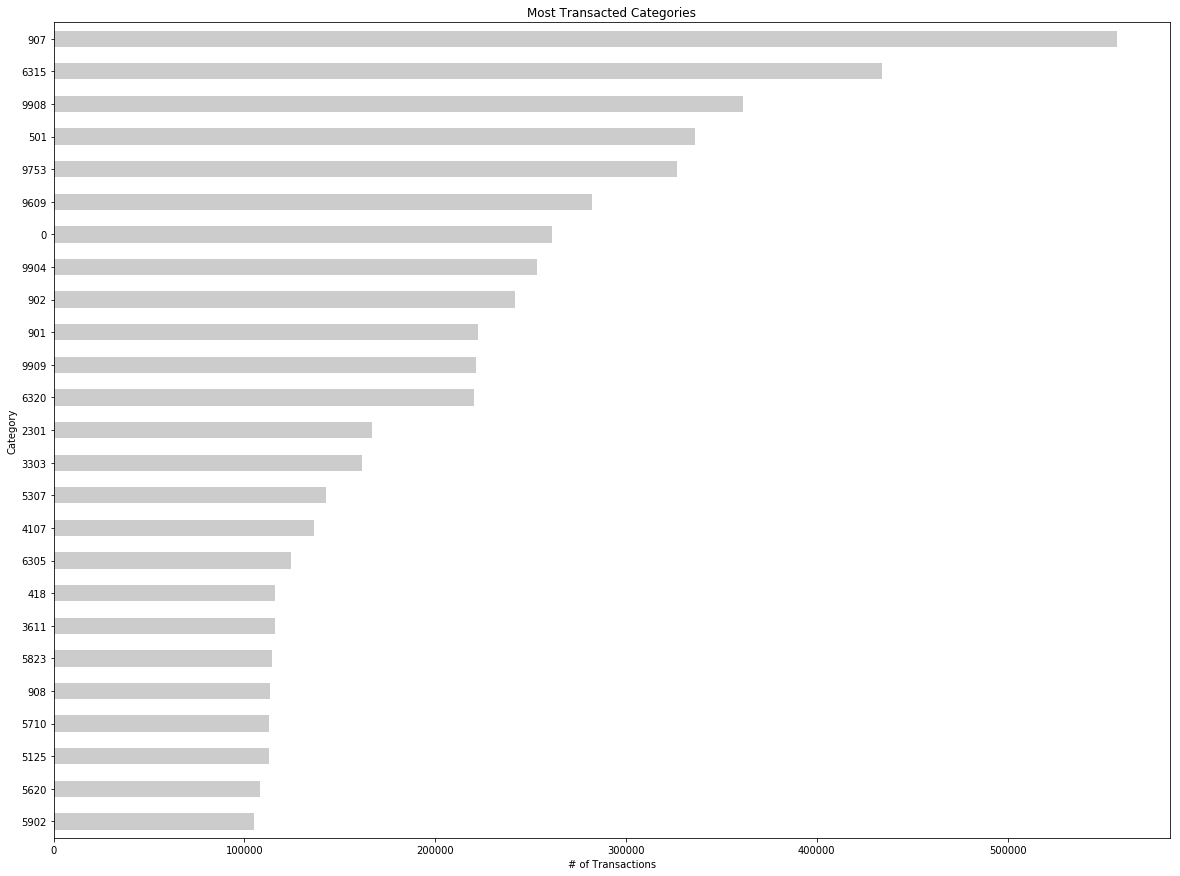

In [26]:
trans_plt = trans.groupby(["category"])["m"].count().reset_index()
t_plt = trans_plt.nlargest(25,'m')
t_plt.groupby(["category"])["m"].sum().sort_values().plot(kind='barh',color='grey', alpha=0.4)
title("Most Transacted Categories")
ylabel("Category")
xlabel("# of Transactions")
_ = rcParams['figure.figsize'] = [20, 15]
savefig('../../plot/popular_trans_category.png', bbox_inches='tight')
show()

<u><b><h3>Plot to view Top 25 Categories with High Total Purchase Amount</h3>

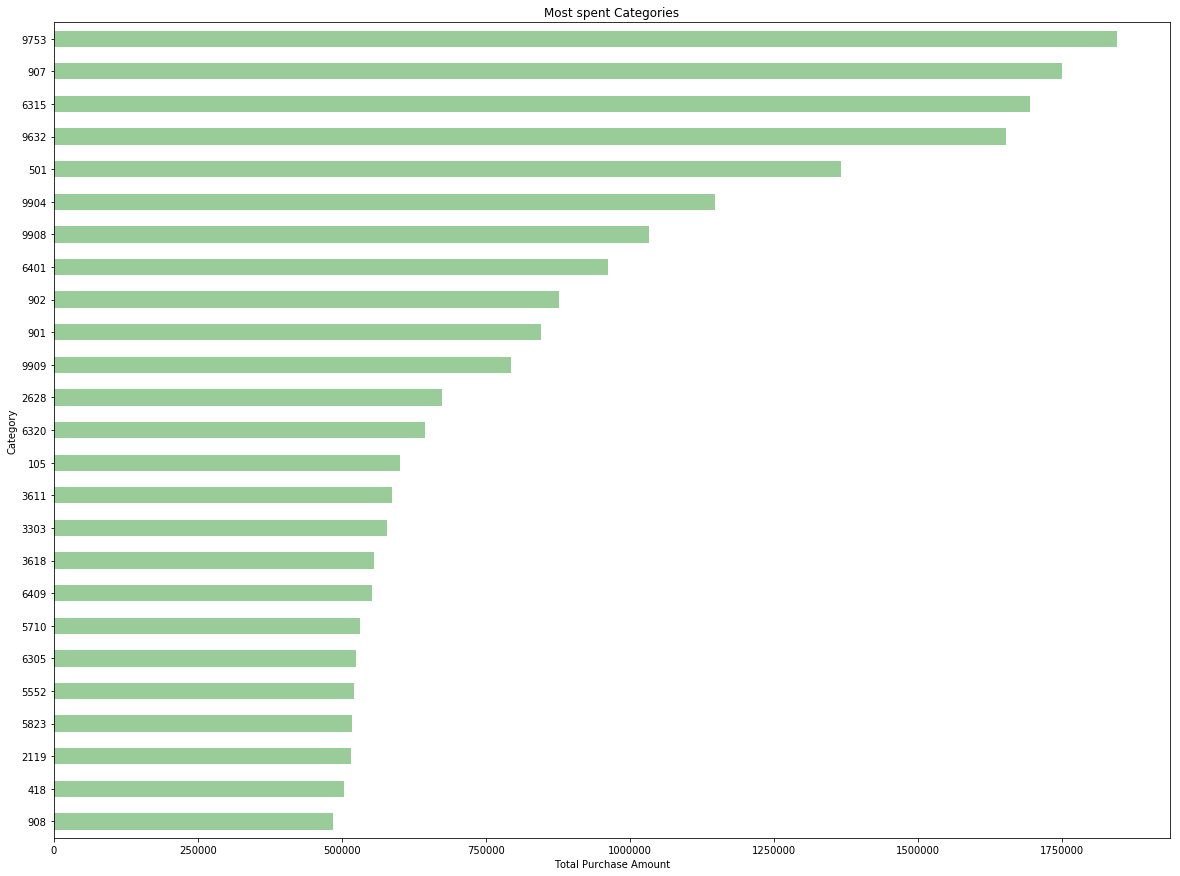

In [27]:
trans_high_amt = trans.groupby(["category"])["purchaseamount"].sum().reset_index()
trans_high_amt_plt = trans_high_amt.nlargest(25,'purchaseamount')
trans_high_amt_plt.groupby(["category"])["purchaseamount"].sum().sort_values().plot(kind='barh',color='green', alpha=0.4)
title("Most spent Categories")
ylabel("Category")
xlabel("Total Purchase Amount")
_ = rcParams['figure.figsize'] = [20, 15]
savefig('../../plot/popular_trans_category_purchase_amount.png', bbox_inches='tight')
show()

* Around `27%` of customers repeat purchase when given offers.
* Based on the Analysis It is clear that `Category`, `Company`,`Offer` and `Brand` are three features which has have correlation to `repeater` which is the target in this project.
* Other features `purchaseamount`, `purchasequantity`,`total_transactions_count` which has some correlation on `repeater`